# Unsupervised Machine Learning - KMeans

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection. SVMs are one of the most robust prediction methods. 

Sources: 
[sklearn](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html?highlight=kmeans#sklearn.cluster.KMeans), [wikipedia](https://en.wikipedia.org/wiki/K-means_clustering)

![kmeans.png](https://www.mathworks.com/matlabcentral/mlc-downloads/downloads/submissions/52579/versions/9/screenshot.jpg)

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets


In [24]:
# Take make moons in built dataset

data_ = datasets.make_moons(200)

In [25]:
# check the dataset

data_

(array([[ 1.01586596e+00, -4.99874128e-01],
        [ 7.03079625e-01, -4.54902241e-01],
        [ 7.66044443e-01,  6.42787610e-01],
        [ 1.07924996e+00, -4.96854776e-01],
        [ 5.27225468e-01,  8.49725430e-01],
        [-4.44066613e-01,  8.95993774e-01],
        [ 9.67948701e-01,  2.51147987e-01],
        [ 3.69447333e-01, -2.76146464e-01],
        [ 9.81928697e-01,  1.89251244e-01],
        [ 6.54860734e-01,  7.55749574e-01],
        [ 6.30552667e-01,  7.76146464e-01],
        [-7.86053095e-01,  6.18158986e-01],
        [-9.75429787e-01,  2.20310533e-01],
        [ 1.82367658e+00, -6.70598639e-02],
        [ 1.52722547e+00, -3.49725430e-01],
        [ 1.60560969e+00, -2.95761841e-01],
        [ 4.44066613e-01,  8.95993774e-01],
        [ 7.33526186e-01, -4.63842159e-01],
        [ 1.90292654e+00,  7.02050879e-02],
        [-4.15415013e-01,  9.09631995e-01],
        [-9.02926538e-01,  4.29794912e-01],
        [ 2.98525112e-01, -2.12694171e-01],
        [ 9.02926538e-01,  4.297

In [26]:
# create input dataframe

inputData = pd.DataFrame(data = data_[0])

In [27]:
inputData.head()

,0,1
0,1.015866,-0.499874
1,0.703080,-0.454902
2,0.766044,0.642788
3,1.079250,-0.496855
4,0.527225,0.849725


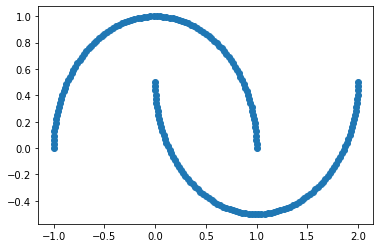

In [28]:
# create a scatter plot for inputData set
plt.scatter(inputData[0],inputData[1])



In [29]:
# create output dataframe

outputData = pd.DataFrame(data = data_[1])
outputData.head()

,0
0,1
1,1
2,0
3,1
4,0


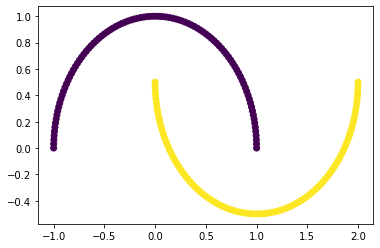

In [30]:
# create a scatter plot for inputData set with outputData color
plt.scatter(inputData[0], inputData[1], c= outputData)



In [33]:
from sklearn.cluster import KMeans

In [34]:
#Call the sklearn Kmeans and make a model with 200 samples
model = KMeans(n_clusters=5)
model.fit(inputData)


#model_fit


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [35]:
# check for labels
model.labels_

array([1, 1, 0, 1, 0, 2, 1, 3, 1, 0, 0, 2, 2, 4, 4, 4, 0, 1, 4, 2, 2, 3,
       0, 3, 1, 4, 1, 3, 1, 0, 1, 2, 2, 3, 1, 0, 2, 2, 4, 0, 4, 2, 0, 1,
       3, 3, 0, 3, 4, 0, 1, 4, 2, 3, 3, 0, 1, 3, 1, 1, 0, 4, 2, 3, 4, 1,
       4, 4, 3, 0, 2, 2, 4, 3, 1, 1, 1, 3, 1, 0, 1, 2, 4, 3, 4, 1, 2, 0,
       4, 2, 1, 0, 1, 3, 0, 4, 2, 0, 2, 4, 4, 3, 3, 3, 0, 1, 2, 0, 3, 0,
       2, 0, 0, 3, 3, 2, 2, 2, 1, 2, 0, 1, 3, 0, 0, 1, 2, 0, 0, 3, 1, 2,
       4, 2, 1, 2, 2, 2, 1, 4, 2, 2, 0, 1, 2, 1, 2, 0, 0, 3, 1, 0, 3, 2,
       1, 1, 0, 4, 0, 0, 4, 1, 3, 2, 0, 1, 2, 1, 2, 4, 1, 2, 3, 0, 3, 4,
       4, 0, 4, 0, 1, 4, 4, 4, 0, 2, 0, 2, 3, 0, 1, 1, 3, 1, 2, 4, 3, 1,
       2, 4], dtype=int32)

In [36]:
from sklearn import metrics

In [37]:
# call metrics and check silhoutte score
metrics.silhouette_score(inputData,model.labels_)



0.4876564609899946

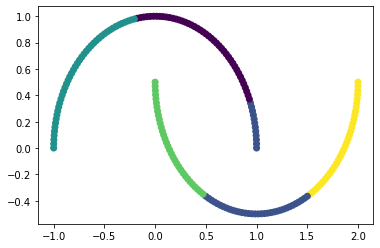

In [39]:
# create a scatter plot for inputData set with model labels color
plt.scatter(inputData[0],inputData[1], c = model.labels_)



#### finding right number of cluster

In [40]:
cluster_range = range(1, 20)
error_list = []

for i in cluster_range:
    model = KMeans(n_clusters=i)
    model.fit(inputData)
    res = model.inertia_
    error_list.append(res)

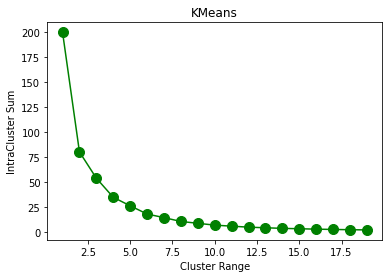

In [41]:
import matplotlib.pyplot as plt

plt.plot(cluster_range, error_list, marker = "o", color = "g", markersize = 10)
plt.xlabel("Cluster Range")
plt.ylabel("IntraCluster Sum")
plt.title("KMeans")
plt.show()